## Observations and Insights 

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [148]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
mouse_count

1893

In [149]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])] 


In [150]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [151]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset="Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [152]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_df["Mouse ID"].count()
clean_mouse_count

249

## Summary Statistics

In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the raw data by Drug Regime
regime_group = combined_df.groupby(["Drug Regimen"])
# From that group find Mean, Median, Variance, Standard Deviation and SEM of the Tumor Volume of each Drug
mean = regime_group["Tumor Volume (mm3)"].mean()
median = regime_group["Tumor Volume (mm3)"].median()
variance = regime_group["Tumor Volume (mm3)"].var()
std_dev = regime_group["Tumor Volume (mm3)"].std()
SEM = regime_group["Tumor Volume (mm3)"].sem()

# Create the Data Frame
summary_df = pd.DataFrame({
    "Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std_dev, "SEM": SEM,
})
# Show the Data Frame
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

# Create new DF from combining by Drug Regimen and just Tumor Volume and get the Mean,  Median, Variance, Standard Deviation and SEM
aggregation = combined_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].aggregate(["mean", "median", "var", "std", "sem"])
aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

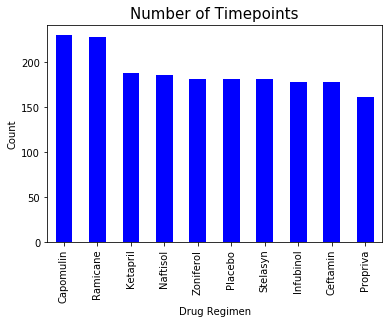

In [155]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Count the values for each Drug Regimen
panda_bars = combined_df["Drug Regimen"].value_counts()
# From that count create a bar chart
plot_pandas = panda_bars.plot.bar(color='b')  
# Put title and labeles
plt.title("Number of Timepoints", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Drug Regimen")

Text(0.5, 0, 'Drug Regimen')

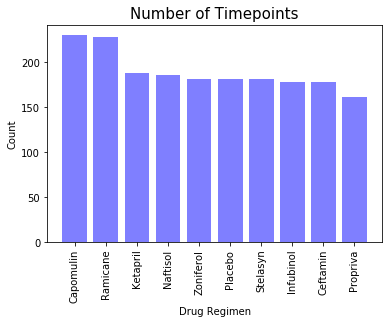

In [156]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set variables to be charted
x_axis = panda_bars.index.values
y_axis = panda_bars.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Number of Timepoints", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Drug Regimen")

Text(0.5, 1.0, 'Gender percentage')

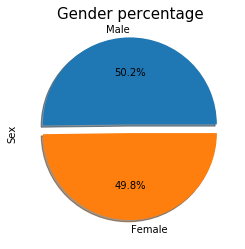

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the iterances of each gender in the clean data frame, use this one to not get duplicates
gender_data = clean_df["Sex"].value_counts()
# set explode
explode = (0.1, 0)
# create pie chart
gender_data.plot.pie(explode=explode,autopct="%1.1f%%",  shadow=True,)

# Set title for chart
plt.title("Gender percentage", fontsize=15)

Text(0, 0.5, 'sex')

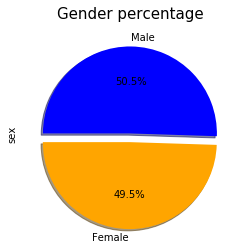

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create chart variables
labels = ["Female", "Male"]
percentage = [49.2, 50.2]
colors = ["orange", "blue"]
explode = explode = (0.1, 0)
# Create plot with variables
plt.pie(percentage, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle = 180)
# Set title and labels for the chart
plt.title("Gender percentage", fontsize=15)
plt.ylabel("sex")


## Quartiles, Outliers and Boxplots

In [159]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Group raw data (to get all the info and not the first apparition of a mouse) by mouse ID
group_df = combined_df.groupby(["Mouse ID"])
# From that grouped df get the max timepoint for each mouse
max_tp = group_df["Timepoint"].max()
# Merge that max timepoint df with the raw original df and drop everything that is not in the max timepoint df
merged_df = pd.merge(max_tp, combined_df, on=("Mouse ID","Timepoint"))
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [160]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# With a for loop iterate through the treatments list to process just the drug we are interested in
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Create a variable to hold the drug we are interested in
    drug = merged_df.loc[merged_df["Drug Regimen"] == treatment]
    
    # Retriebe Tumor volume from 
    sizes = drug["Tumor Volume (mm3)"]
    # Record the data into the empty list
    tumor_data.append(sizes)
    
    # Determine outliers using upper and lower bounds for each drug regimen
    quartiles = sizes.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print everything     
    print(f"IQR for {treatment}: {iqr}")
    print(f"Lower bound for {treatment}: {lower_bound}")
    print(f"Upper bound for {treatment}: {upper_bound}")

IQR for Capomulin: 7.781863460000004
Lower bound for Capomulin: 20.70456164999999
Upper bound for Capomulin: 51.83201549
IQR for Ramicane: 9.098536719999998
Lower bound for Ramicane: 17.912664470000003
Upper bound for Ramicane: 54.30681135
IQR for Infubinol: 11.477135160000003
Lower bound for Infubinol: 36.83290494999999
Upper bound for Infubinol: 82.74144559000001
IQR for Ceftamin: 15.577752179999997
Lower bound for Ceftamin: 25.355449580000002
Upper bound for Ceftamin: 87.66645829999999


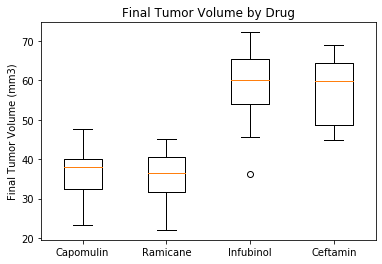

In [161]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
# Use the list with the data we recorded in the previous step
ax1.boxplot(tumor_data, labels=treatments) 
# Set title and labels
plt.title("Final Tumor Volume by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
# Show plot
plt.show()

## Line and Scatter Plots

In [162]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_df = combined_df.loc[combined_df["Mouse ID"] == "s185",:]
s185_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


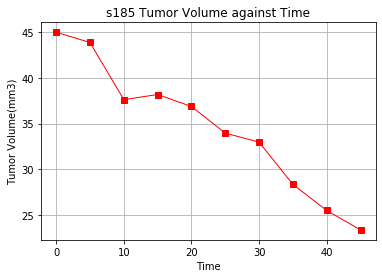

In [163]:
# From the previous s185 data frame we retrieve the timepoint and tumor value values
x_axis = s185_df["Timepoint"].values
y_axis = s185_df["Tumor Volume (mm3)"].values
# Create line graph
plt.plot(x_axis, y_axis, marker="s", color="Red", linewidth=1, label="S185")
# Set title, lables and grid
plt.title("s185 Tumor Volume against Time")
plt.xlabel("Time")
plt.ylabel("Tumor Volume(mm3)")
plt.grid()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

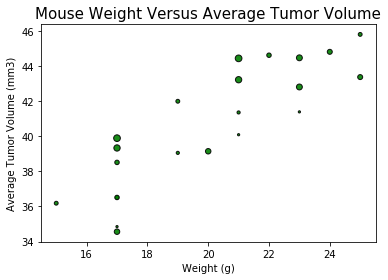

In [164]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create new df to hold only the capomulin data
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
# create a new df grouping by mouse id
id_group = capomulin_df.groupby(["Mouse ID"])
# Create variable to hold the tumor volume mean and weight mean
avg__tumor_vol = id_group["Tumor Volume (mm3)"].mean()
mouse_weight = id_group["Weight (g)"].mean()
# Create plot
plt.scatter(mouse_weight, avg__tumor_vol, marker="o", facecolors="green", edgecolors="black", s=x_axis, alpha=0.90)
# Set title and labels
plt.title("Mouse Weight Versus Average Tumor Volume",fontsize =15)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

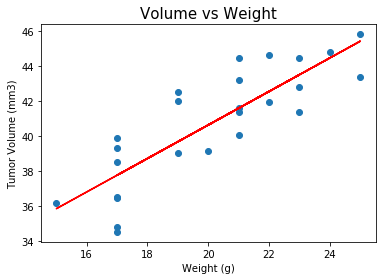

The correlation coefficient between Weight an Tumor Volume is 0.84


In [165]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Set x and y values using the previous steps variables
x_values = mouse_weight
y_values = avg__tumor_vol
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Set regression value
regress_values = x_values * slope + intercept
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Set title and labels
plt.title("Volume vs Weight", fontsize=15)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The correlation coefficient between Weight an Tumor Volume is {round(st.pearsonr(x_values,y_values)[0],2)}")